In [ ]:
# This notebook gives some functions of pandas library to deal with raw data. 

•	Load data into a pandas DataFrame

In [4]:
import pandas as pd

data = {'type_property': ['Apartment', 'House', 'Villa', 'Condo', 'Loft', 'Mansion', 'Chalet', 'Castle', 'Cottage', 'Ranch'],
        'parent_names_of_place': ['|Tokyo|Yokohama|Kawasaki|', '|Washington D.C.|New York|Boston|', '|London|Manchester|Birmingham|', '|Cambridge|Oxford|Bristol|', '|Paris|Lyon|Marseille|', '|Madrid|Barcelona|Valencia|', '|Rome|Milan|Naples|', '|Berlin|Hamburg|Munich|', '|Amsterdam|Rotterdam|Utrecht|', '|Sydney|Melbourne|Brisbane|'],
        'region': ['Asia', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Australia'],
        'latitude-longitude': ['35.6895, 139.6917', '38.9072, -77.0369', '51.5074, -0.1278', '51.7520, -1.2577', '48.8566, 2.3522', '40.4168, -3.7038', '41.9028, 12.4964', '52.5200, 13.4050', '52.3702, 4.8952', '33.8688, 151.2093'],
        'area_m2': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'price_euro': ['€100,000', '€200,000', '€300,000', '€400,000', '€500,000', '€600,000', '€700,000', '€800,000', '€900,000', '€1,000,000']}

df = pd.DataFrame(data)

In [5]:
df.head()

,type_property,parent_names_of_place,region,latitude-longitude,area_m2,price_euro
0,Apartment,|Tokyo|Yokohama|Kawasaki|,Asia,"35.6895, 139.6917",100,"€100,000"
1,House,|Washington D.C.|New York|Boston|,North America,"38.9072, -77.0369",200,"€200,000"
2,Villa,|London|Manchester|Birmingham|,Europe,"51.5074, -0.1278",300,"€300,000"
3,Condo,|Cambridge|Oxford|Bristol|,Europe,"51.7520, -1.2577",400,"€400,000"
4,Loft,|Paris|Lyon|Marseille|,Europe,"48.8566, 2.3522",500,"€500,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   type_property          10 non-null     object
 1   parent_names_of_place  10 non-null     object
 2   region                 10 non-null     object
 3   latitude-longitude     10 non-null     object
 4   area_m2                10 non-null     int64 
 5   price_euro             10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [7]:
# Verify missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   type_property          10 non-null     object
 1   parent_names_of_place  10 non-null     object
 2   region                 10 non-null     object
 3   latitude-longitude     10 non-null     object
 4   area_m2                10 non-null     int64 
 5   price_euro             10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [8]:
# divide the latitude-longitude column into 2 columns
df[["latitude","longitude"]] = df["latitude-longitude"].str.split(",", expand=True).astype(float)
df.head()

,type_property,parent_names_of_place,region,latitude-longitude,area_m2,price_euro,latitude,longitude
0,Apartment,|Tokyo|Yokohama|Kawasaki|,Asia,"35.6895, 139.6917",100,"€100,000",35.6895,139.6917
1,House,|Washington D.C.|New York|Boston|,North America,"38.9072, -77.0369",200,"€200,000",38.9072,-77.0369
2,Villa,|London|Manchester|Birmingham|,Europe,"51.5074, -0.1278",300,"€300,000",51.5074,-0.1278
3,Condo,|Cambridge|Oxford|Bristol|,Europe,"51.7520, -1.2577",400,"€400,000",51.7520,-1.2577
4,Loft,|Paris|Lyon|Marseille|,Europe,"48.8566, 2.3522",500,"€500,000",48.8566,2.3522


In [9]:
# getting the state from parent_names_of_place
df["state"] = df["parent_names_of_place"].str.split("|", expand=True)[3]
df["state"]

0      Kawasaki
1        Boston
2    Birmingham
3       Bristol
4     Marseille
5      Valencia
6        Naples
7        Munich
8       Utrecht
9      Brisbane
Name: state, dtype: object

In [10]:
# Transform object to float
df['price_euro'] = (
    df['price_euro']
    .str.replace("€","",regex=False)
    .str.replace(",","")
    .astype(float)
)

In [11]:
# removing non-relevant columns from the dataframe
df.drop(columns=['parent_names_of_place','latitude-longitude'], inplace=True)
df.head()

,type_property,region,area_m2,price_euro,latitude,longitude,state
0,Apartment,Asia,100,100000.0,35.6895,139.6917,Kawasaki
1,House,North America,200,200000.0,38.9072,-77.0369,Boston
2,Villa,Europe,300,300000.0,51.5074,-0.1278,Birmingham
3,Condo,Europe,400,400000.0,51.7520,-1.2577,Bristol
4,Loft,Europe,500,500000.0,48.8566,2.3522,Marseille


In [12]:
# upgrade the prices
df["price_euro"] = (df["price_euro"]*3.19).round(2)

Visualize the data after processing

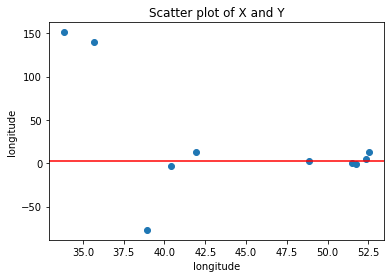

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(df['latitude'], df['longitude'])
plt.axhline(y=3, color='red', linestyle='-')
plt.xlabel('longitude')
plt.ylabel('longitude')
plt.title('Scatter plot of X and Y')
plt.show()


In [18]:
df['price_euro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: price_euro
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


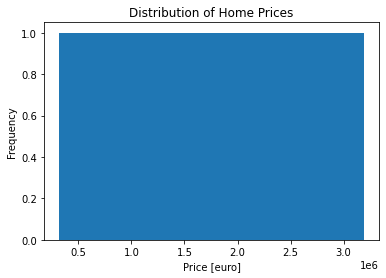

In [22]:
# Build histogram
plt.hist(df['price_euro']);

# Label axes
plt.xlabel('Price [euro]');
plt.ylabel('Frequency');

# Add title
plt.title('Distribution of Home Prices');

# Don't change the code below 👇
plt.savefig("images/hist.png", dpi=150)

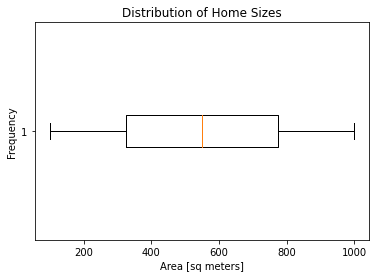

In [21]:
# Build box plot
plt.boxplot(df['area_m2'], vert=False);
# Label axes
plt.xlabel('Area [sq meters]');
plt.ylabel('Frequency');
# Add title
plt.title('Distribution of Home Sizes');


# Don't change the code below 👇
plt.savefig("images/boxplot.png", dpi=150)

In [24]:
df['price_euro']

0     319000.0
1     638000.0
2     957000.0
3    1276000.0
4    1595000.0
5    1914000.0
6    2233000.0
7    2552000.0
8    2871000.0
9    3190000.0
Name: price_euro, dtype: float64

In [25]:
# The following code is to calculate the mean price by region
mean_price_by_region = df.groupby("region")["price_euro"].mean().sort_values()
mean_price_by_region

region
Asia              319000.0
North America     638000.0
Europe           1914000.0
Australia        3190000.0
Name: price_euro, dtype: float64

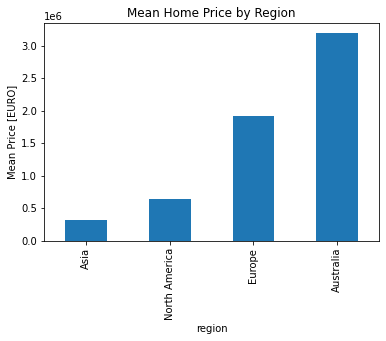

In [26]:
# The following code is for visualizing data using Barchart
# Build bar chart, label axes, add title
mean_price_by_region.plot(kind='bar',xlabel="region",ylabel="Mean Price [EURO]", title='Mean Home Price by Region')
# Don't change the code below 👇
plt.savefig("images/barchart.png", dpi=150)

In [27]:
# The following code is for creating a new dataframe containing only the values of the European regions. 
df_Europe = df[df['region'] == 'Europe']
df_Europe.head()

,type_property,region,area_m2,price_euro,latitude,longitude,state
2,Villa,Europe,300,957000.0,51.5074,-0.1278,Birmingham
3,Condo,Europe,400,1276000.0,51.7520,-1.2577,Bristol
4,Loft,Europe,500,1595000.0,48.8566,2.3522,Marseille
5,Mansion,Europe,600,1914000.0,40.4168,-3.7038,Valencia
6,Chalet,Europe,700,2233000.0,41.9028,12.4964,Naples


In [30]:
# The following code gives the number of values for each state.
homes_by_state = df_Europe['state'].value_counts()
homes_by_state

Birmingham    1
Bristol       1
Marseille     1
Valencia      1
Naples        1
Munich        1
Utrecht       1
Name: state, dtype: int64

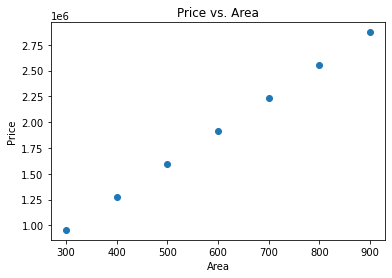

In [33]:
# Subset data
df_south_rgs = df_Europe

# Label axes
plt.scatter(x=df_south_rgs['area_m2'],y=df_south_rgs['price_euro'])
plt.xlabel('Area');
plt.ylabel('Price');

# Add title
plt.title("Price vs. Area")

# Don't change the code below 👇
plt.savefig("images/scatter.png", dpi=150)

In [35]:
# The following code gives the correlation between two variables.
south_states_corr = df_south_rgs['area_m2'].corr(df_south_rgs['price_euro'])
south_states_corr

1.0